# Homework 1: Confidence Intervals and Bootstrapping
***

**Name**: Sasi Jyothirmai Bonu

***

This assignment is due on Canvas by **Friday February 2 at 5:59PM**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified R code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- There are 3 total questions on this assignment. 
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked here. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 



---

## Problem 1. Net Promoter Score

Have you ever seen a survey like this?

![NPS](https://github.com/alexyarosh/stat5000-f23/blob/69a5633a9a37bcc06105e9c18115a6486a45f142/NPS_survey.png?raw=true)


One of the most widely used customer satisfaction metrics is [NPS - Net Promoter Score](https://en.wikipedia.org/wiki/Net_promoter_score). It is  extremely popular, especially among the executives  -- Wikipedia claims that "versions of the NPS are now used by two-thirds of Fortune 1000 companies". But statisically, it is problematic, and it has to be used with care, as you will hopefully see from this problem!

Here's how the NPS is computed from a survey like the one above:
* We call a specific response a **"promoter"** if the rating given is 9 or 10
* We call a response a **"detractor"** if the rating given is 6 or below
* We call a response neutral if the rating is 7 or 8

$$NPS = \frac{\text{number of promoters}-\text{number of detractors}}{\text{total number of responses}} * 100$$

So for example if the sample of responses to the survey is
```
10, 9, 5, 6, 7, 9, 9, 7, 2, 8
```
then we have 4 promoters (scores `10,9,9,9`) and 3 detractors (scores `5,6,2`), and  3 neutral responses, therefore

$$NPS = \frac{4 - 3}{10}*100 = 10$$

Notice that NPS can range from -100 (all responses are detractors) to 100 (all responses are promoters). Positive NPS generally signifies positive sentiment, and one of the company's objectives can be to maximize it.

NPS is supposed to measure the general customer sentiment and loyalty towards the product, but only a small subset of people usually fill the survey, so we can use **inference techniques** to estimate what the general sentiment is based on the NPS from the sample.

## 1.1 [3 point]
Let's say we have a sample of 10 responses to the NPS survey
`10, 9, 5, 6, 7, 9, 9, 7, 2, 8` and we receive another response.

**What is the resulting NPS from the 11 responses if the 11th response is**:

a. A promoter

b. A detractor

c. Neutral

a. $$NPS = \frac{5 - 3}{11}*100 = 18.18$$
b. $$NPS = \frac{4 - 4}{11}*100 = 0$$
c. $$NPS = \frac{4 - 3}{11}*100 = 9.09$$

Let's say we have a survey with $n$ responses, and let $R_i$, $i=1, \dots, n$ be a discrete random variable that takes value 1 if the response $i$ is a promoter, value 0 if the response is neutral, and -1 if $R_i$ is a detractor.

In other words, $R_i$, $i=1,\dots, n$ is a random sample of $n$ responses.

## 1.2 [4 points]
If the probability of i’th response being a promoter is $p_P$, the probability of it being a detractor is $p_D$, **what is the expected value** $E[R_i]$ **and variance**  $Var[R_i]$ of $R_i$?

The expected value $E[R_i]$ is 

$E[R_i] = (1*p_P)+(0*(1 − p_P − p_D))+(−1*p_D)$
$= p_P - p_D$ 

$Var[R_i] = E[R_i^2] - (E[R_i])^2$

From the expected value calculated above.

$E[R_i^2] = (1^2*p_P)+(0^2*(1 − p_P − p_D))+(−1^2*p_D) = p_P + p_D$

Hence,


$Var[R_i] = p_P + p_D - (p_P - p_D)^2$


$p_P + p_D - ((p_P)^2 + (p_D)^2 - 2*p_P*p_D)$

$p_P + p_D - (p_P)^2 - (p_D)^2 + 2*p_P*p_D$

## 1.3 [2 point]
For the remainder of the problem, let's ignore multiplication by $100$ in the NPS computation. It's just rescaling, and doesn't really affect the conclusion, but it complicates the computations.

**Explain why $NPS = \bar{R}$, where $\bar{R} = \frac{R_1 + \dots R_n}{n}$, the sample mean of $R_1, \dots, R_n$**

By reducing the numbers to either 1,0, or -1, we're eliminating the value of the number. Thus, when we add the numbers, we are just getting the count of the numbers with promoters being positive and defactors being negative. This effectively reduces NPS to the sample mean.


Let us take the sample mentioned above (`10, 9, 5, 6, 7, 9, 9, 7, 2, 8`) and get $R_i$. Hence $R_i$ would be `1,1,-1,-1,0,1,1,0,-1,0`.

Now if we calculate NPS, it would be

$$NPS = \frac{4 - 3}{10} = 0.1$$

Similarly, if we get the sample mean,

$$\bar{R} = \frac{1+1-1-1+0+1+1+0-1+0}{10} = 0.1$$

Hence, $NPS = \bar{R}$

## 1.4 [3 points]

**Considering that $NPS$ can be seen as a sample mean, what is the approximate distribution of $NPS$ for large sample sizes $n$? Make sure to state the mean and variance of that distribution.**


_Hint 1. There is a *very important*, one could even say "central", theorem..._

_Hint 2. Refer to STAT 5000 to remind yourself what is the mean and variance of a sample mean from an iid sample with population mean $\mu$ and variance $\sigma^2$_



Considering that $NPS$ can be seen as a sample mean, the approximate distribution of $NPS$ for large sample sizes $n$ would be approximately normally distributed. According to the central limit theorem, the mean of the sample distribution would be equal to the mean of the population

Hence, $$ \mu_R = \mu$$

The variance of the sample mean is equal to the population variance divided by the sample size ($n$).

Hence, $$ \sigma^2_R = \frac{\sigma^2}{n}$$

$$ CI = (\mu - {Z}_\frac{\alpha}{2} \frac{\sigma}{\sqrt{n}} , \mu + {Z}_\frac{\alpha}{2} \frac{\sigma}{\sqrt{n}}) $$



## 1.5 [2 points]

**Write down the 95% $z$ confidence interval for $NPS$.**

_Note 1: Problem 1.4 is what tells us that we can use the $z$ confidence interval in the first place! Remember that "$z$" refers to!_

_Note 2: Feel free to just use 1.96 as the critical value_

The 95% $z$ confidence interval for $NPS$ is

$$CI  = \bar{R} - z * \sqrt{\frac{\sigma^2_R}{n}}, \bar{R} + z * \sqrt{\frac{\sigma^2_R}{n}}$$


$$CI  = 0.1 - 1.96 * \sqrt{\frac{\sigma^2_R}{10}}, 0.1 + 1.96 * \sqrt{\frac{\sigma^2_R}{10}}$$



## 1.6 [2 point]

Let's say that on a survey with 30 responses,  the propotion of promoters was 0.5, and proportion of detractors was 0.3.

Then the $NPS$ (without multiplying by 100) is $0.5 - 0.3 = 0.2$.
**What is the 95\% confidence interval for this score?**

Since $NPS = \bar{R}, \bar{R} = 0.2$

Hence,

$$CI  = \bar{R} - z * \sqrt{\frac{\sigma^2_R}{n}}, \bar{R} + z * \sqrt{\frac{\sigma^2_R}{n}}$$



$$CI  = 0.2 - 1.96 * \sqrt{\frac{\sigma^2_R}{30}}, 0.2 + 1.96 * \sqrt{\frac{\sigma^2_R}{30}}$$


$$\sigma^2_R = \frac{(\mu_R * (1 - \mu_R))}{n} = 0.05$$

Plugging in


$$CI  = 0.2 - 1.96 * \sqrt{\frac{0.05}{30}}, 0.1 + 1.96 * \sqrt{\frac{0.05}{30}}$$


$$ CI  = (0.057,0.344)$$


In [1]:
n <- 30 
mean_nps <- 0.2
Z_alpha <- 1.96

var <- (mean_nps * (1 - mean_nps)) / n
margin_of_error <- Z_alpha * sqrt(var)

lower_lim <- mean_nps - margin_of_error
upper_lim <- mean_nps + margin_of_error

cat("95% Confidence Interval is (", lower_lim, ", ", upper_lim, ")\n")

95% Confidence Interval is ( 0.05686184 ,  0.3431382 )


---

NPS is widely used in customer analytics, but it doesn't have built-in procedures in R like `t.test` for mean or `prop.test` for proportion, and you might not want to go through the computation above every time you want to report NPS together with the margin of error or its CI. So creating a bootstrap confidence interval can be a good alternative.

---

## Problem 2: Bootstrapping Net Promoter Scores

(For the definition of NPS, see Problem 1)

The code below reads an example dataset of NPS survey responses into the dataframe `data`. The responses are in the `response` column.


In [2]:
data <- read.csv('https://raw.githubusercontent.com/alexyarosh/stat5000-f23/main/nps.csv')
head(data)

,response
,<int>
1,10
2,5
3,8
4,9
5,8
6,10


## 2.1 [3 points]

**Create a function called `nps()` that takes a vector of survey responses as an argument and returns the NPS based on those responses. Demonstrate the function by calling it on the `response` column of `data`.**

In [3]:
nps <- function(feedback) {
  promoters <- sum(feedback >= 9)
  detractors <- sum(feedback <= 6)
  
  nps_value <- (promoters - detractors) / length(feedback) * 100
  
  return(nps_value)
}
result <- nps(data$response)

cat("NPS is ", result, "\n")

NPS is  8.318264 


The NPS of the responses in the data is 8.318264.

## 2.2 [3 points]
**Create one bootstrap sample from the `response` column of `data`, and compute the NPS for that boostrap sample.**

In [4]:
set.seed(7)
sample_bootstrap <- sample(data$response, replace = TRUE)
nps_sample_bootstrap <- nps(sample_bootstrap)

cat("NPS of the bootstrap sample is ", nps_sample_bootstrap, "\n")

NPS of the bootstrap sample is  9.825196 


From the bootstrap sample, the NPS calculated is 9.825196.

## 2.3 [4 points]

1. Create 30 bootstrap samples of the `response` column of `data`. Save them in a variable.
2. Compute NPS for each sample
3. Plot the distribution of bootstrapped NPS by plotting a normalized histogram of these scores


*Hint: The function `replicate()` might be helpful*

*Note: Recall that if you're using `ggplot`, you can normalize a histogram by specifying `y = after_stat(density)` inside `aes` in `geom_histogram()`*

_Notice that 30 is the number of bootstrap samples, not the size of them! The size of any bootstrap sample sample is just the size of the dataset, because the dataset is the sample._


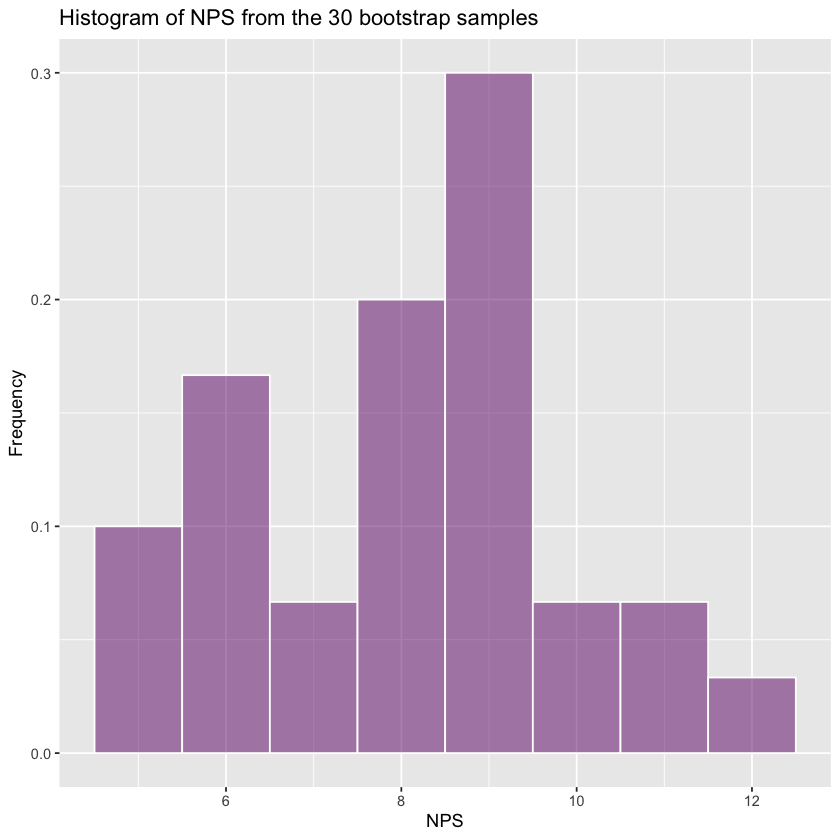

In [5]:
set.seed(7)
sample_bootstraps <- replicate(30,sample(data$response, replace = TRUE))
nps_sample_bootstraps <- apply(sample_bootstraps, 2, nps)

library(ggplot2)

ggplot(data.frame(NPS = nps_sample_bootstraps), aes(x = NPS)) +
  geom_histogram(binwidth = 1, fill = "#6a0572", color = "white", alpha = 0.5, aes(y = after_stat(density))) +
  labs(title = "Histogram of NPS from the 30 bootstrap samples",
       x = "NPS",
       y = "Frequency")

## 2.4 [4 points]

1. Repeat the process in the previous question, but generate 3000 samples this time. Save the 3000 NPS results in a variable -- you'll use them in the next question.
2. Plot the normalized histogram of the 3000 samples, and a density plot in a different color.
3. Also, add a vertical line at the NPS value for the original dataset (in a third color)

The distribuion should look much smoother now. **What can you say about the shape of the bootstrap distribution, and the role of the NPS of the original dataset in it?**

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


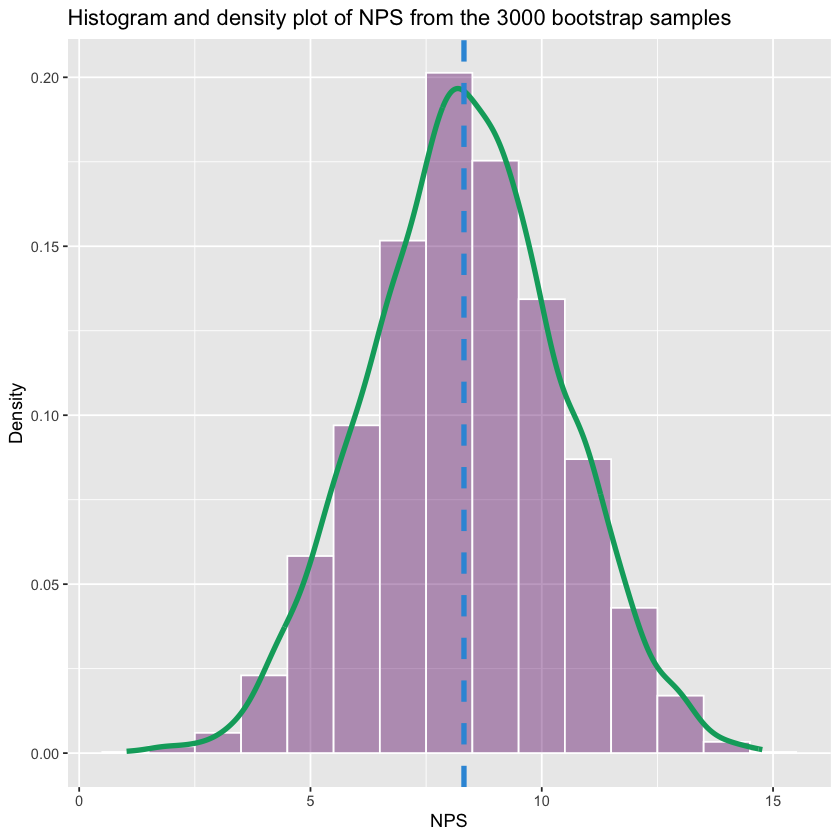

In [6]:
set.seed(7)
sample_bootstraps <- replicate(3000,sample(data$response, replace = TRUE))
nps_sample_bootstraps <- apply(sample_bootstraps, 2, nps)

library(ggplot2)

ggplot(data.frame(NPS = nps_sample_bootstraps), aes(x = NPS)) +
  geom_histogram(binwidth = 1, fill = "#6a0572", color = "white", alpha = 0.4, aes(y = after_stat(density))) +
  geom_density(aes(x = nps_sample_bootstraps), color = "#00a86b", size = 1.5) +
  geom_vline(xintercept = nps(data$response), color = "#3498db", linetype = "dashed", size = 1.5) +
  labs(title = "Histogram and density plot of NPS from the 3000 bootstrap samples",
       x = "NPS",
       y = "Density")

---

When reporting business metrics (like NPS scores) that are based on samples, it's a good idea to also specify the margin of error or the the confidence interval, so that the audience of the report understands how to interpret the metric. For example, it can look something like $20.3 \pm 3.56$, or $(52.4, 61.3)$

Given the boostrap distribution that you just obtained, we'll compute the 95\% confidence interval for the NPS of the original dataset.

There are multiple methods of obtaining CIs from bootstrap samples. We'll use a method called **percentile bootstrap**: to determine the 95\% CI, we'll find such values that 95\% of the bootstrap distribution lies within those values:

![bootstrap distribution](https://github.com/alexyarosh/stat5000-f23/blob/main/bootstrap_ci.png?raw=true)

For this symmeric distribution, this means we need to find one value such that 2.5\% (half of 5\%) of the bootstrap distribution is to the left of it, and another value such that 2.5\% of the distribution is to the right.


---

## 2.5 [3 points]

**Use the built in `quantile()` function to find the lower and upper limits of the 95\% confidence interval for the bootstrap distribution that you created in 2.4**.

In [7]:
lower <- quantile(nps_sample_bootstraps, 0.025)
upper <- quantile(nps_sample_bootstraps, 0.975)

cat("Lower limit is", lower, "and the upper limit is", upper,". Hence the 95% confidence interval is (", lower,",", upper, ").")

Lower limit is 4.338457 and the upper limit is 12.29656 . Hence the 95% confidence interval is ( 4.338457 , 12.29656 ).

The lower limit is 4.338457 and the upper limit is 12.29656. Hence the 95% confidence interval is (4.338457,12.29656).

## 2.6 [2 points]

**Compute the differences between the original sample NPS and the lower/upper limits for the confidence interval.**

Are they equal? Should we expect them to be? Why or why not?

Hint: is the distribution *perfectly, completely symmetric*?

In [8]:
lower_diff <- result - lower
upper_diff <- upper - result

cat("Difference of the original sample NPS from the lower limit is", lower_diff, "\n")
cat("Difference of the original sample NPS from the upper limit is", upper_diff, "\n")


Difference of the original sample NPS from the lower limit is 3.979807 
Difference of the original sample NPS from the upper limit is 3.9783 


They are nearly equal. Since the distribution is almost symmetric and the first sample NPS line passed through the center, it is expected for them to be equal.

## Problem 3: How old are cats in animal shelters?

Austin city government regularly [publishes data](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) about animals in the city-run animal shelter. The code below loads information about a _sample_ of cats from that shelter into the variable `cats`:

In [9]:
cats <- read.csv('https://raw.githubusercontent.com/alexyarosh/stat5000-f23/main/cats.csv')
head(cats)

,X,animal_id,name,outcome_type,animal_type,breed,color,age_days
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,A846341,,Adoption,Cat,Domestic Shorthair,Blue Tabby,55
2,2,A772759,*Bella,Adoption,Cat,Domestic Medium Hair Mix,Blue,63
3,3,A666893,Pristy,Transfer,Cat,Domestic Shorthair Mix,Black,2237
4,4,A753626,*Mooney,Adoption,Cat,Domestic Shorthair Mix,Black,92
5,5,A747591,,Transfer,Cat,Domestic Longhair Mix,Brown Tabby,369
6,6,A703272,*Catelyn,Adoption,Cat,Domestic Shorthair Mix,Cream Tabby/White,88


This data contains information about each cat, like their name, age and breed, as well as the outcome for them (e.g. "Adoption").

In this problem, we'll be working with `age_days` column, which contains the estimated age of the cat (at the moment of the outcome, so e.g. at the moment of adoption).

This granularity - days instead of for example years - is important, as we'll see shortly.

## 3.1 [2 point]

**Do you think most of the cats in the shelter are kittens? Adults? Seniors? Everyone in equal measure?..**

_You don't need to analyze data, and there's no incorrect answer to this question. Just write what your intuition tells you!_

I think most of the cats in the shelter are kittens.

## 3.2 [2 points]

**Plot the histogram of the ages of the cats in this sample (the `age_days` column).**

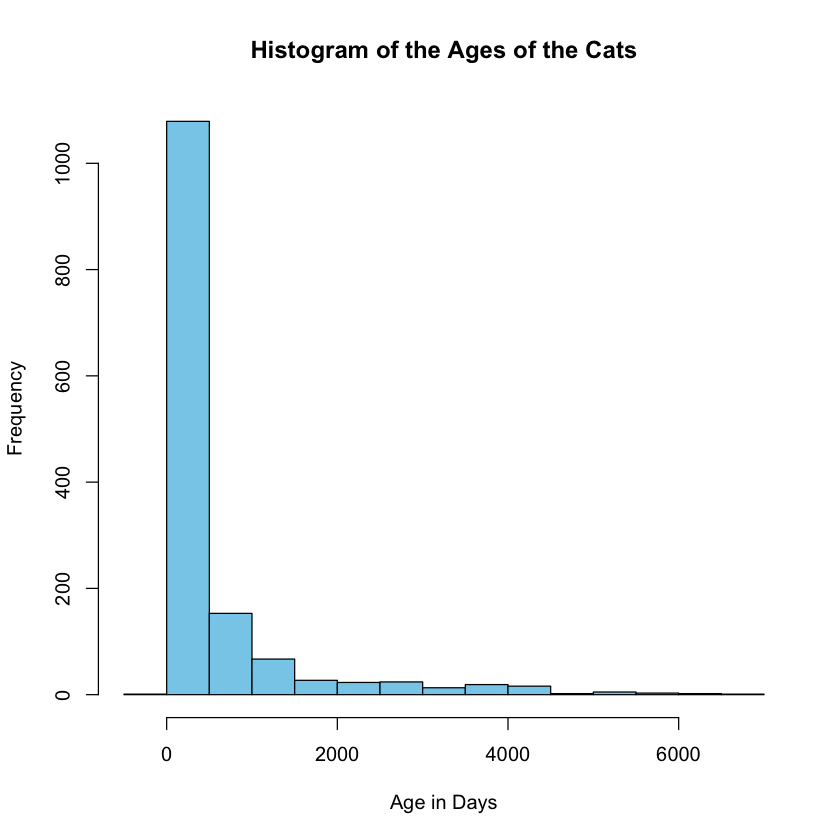

In [10]:
hist(cats$age_days, col = "skyblue", main = "Histogram of the Ages of the Cats", xlab = "Age in Days")

The histogram shows that most of the cats in the shelter are kittens, around a year old.

## 3.3 [2 point]

**Compute the mean and the median of cat ages in the `cats` sample.**

In [11]:
mean_age <- mean(cats$age_days)
median_age <- median(cats$age_days)

cat("The mean and median ages of the cats are", mean_age, "and", median_age,"respectively.")

The mean and median ages of the cats are 518.7756 and 110 respectively.

The mean and median ages of the cats are 518.7756 (1.5 years) and 110 (~ 4 months) respectively.

## 3.4 [2 points]

Considering the shape of the distribution that you plotted in 3.2, **which of the two measures - mean or median - is a more meaningful measure of "centrality" for this data? Why?**

I consider the median to be a reliable indicator of centrality. Since the age is expressed in days, the mean may become skewed, but the median indicates the approximate number of cats at each age.

## 3.5 [3 points]

1. Generate 1000 bootstrap samples of cat ages, and compute the median for each sample
2. Plot the histogram and density plot (in different colors) of the distribution of the 1000 bootstrapped medians
3. Add a vertical line (in a different color) at the value of the sample median of `cats$age_days`

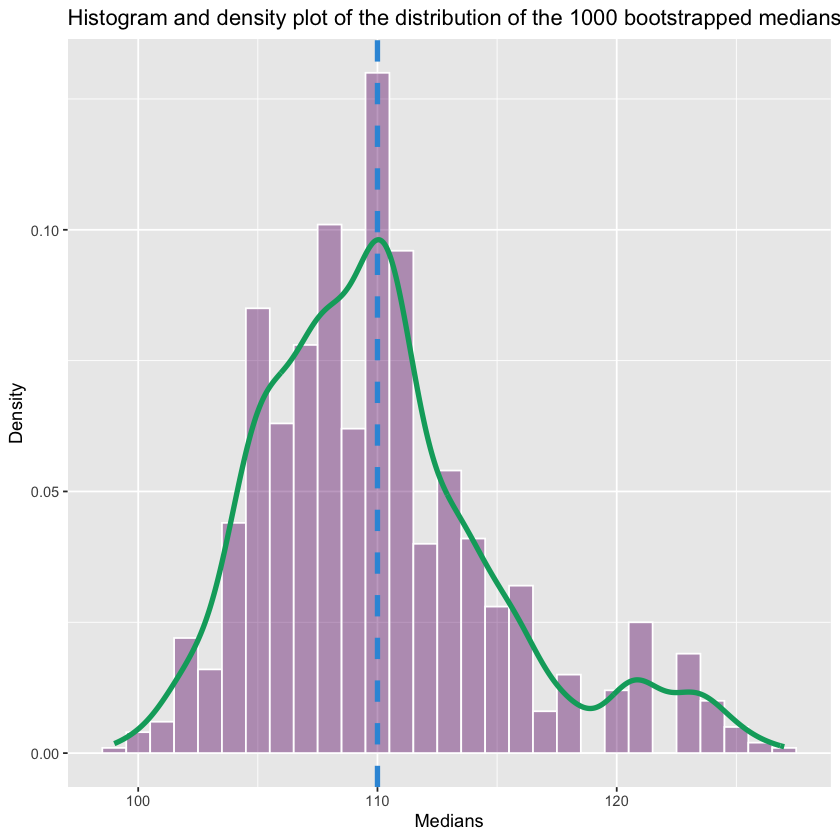

In [12]:
set.seed(7)
cat_sample_bootstraps <- replicate(1000,sample(cats$age_days, replace = TRUE))
median_sample_bootstraps <- apply(cat_sample_bootstraps, 2, median)

library(ggplot2)

ggplot(data.frame(medians = median_sample_bootstraps), aes(x = medians)) +
  geom_histogram(binwidth = 1, fill = "#6a0572", color = "white", alpha = 0.4, aes(y = after_stat(density))) +
  geom_density(aes(x = median_sample_bootstraps), color = "#00a86b", size = 1.5) +
  geom_vline(xintercept = median_age, color = "#3498db", linetype = "dashed", size = 1.5) +
  labs(title = "Histogram and density plot of the distribution of the 1000 bootstrapped medians",
       x = "Medians",
       y = "Density")

The distribution is seems to be rightly skewed with the original median being almost a little left to the center.

## 3.6 [2 points]

**Do you think this distribution is well approximated by a normal distribution? What deviations from normality can you detect, if any?**

_Make sure your reasoning is consistent with your plot._

No, a normal distribution does not accurately represent this distribution. Since a normal distribution is absolutely unimodal, the presence of many peaks in the distribution explains the deviation from normalcy. Multiple peaks suggest the possibility of outliers, which prevents us from creating a bell-shaped curve that follows a normal distribution.

## 3.7 [2 points]

Take a look at the density plot of bootstrapped medians that you created beofre. **Do you think the percentile bootstrap CI will be symmetric around the median of the original sample? Which of the lower/upper limits do you think will be closer to the sample median, and why?**

_Note: the answer completely depends on your specific bootstrap samples! It's can be different for different people, and even for different executions of the same code._

_Don't forget to justify your answer! You can use the density plot you generated before to eyeball where the percentiles will be, based on the "mass" of the distribution._

The degree of skewness in the original data determines how close the sample median is to the lower or higher bounds of the bootstrap confidence interval. The portion of the CI that extends in the skew's direction is likely to be farther from the sample median for skewed distributions, reflecting the pull of the tail. Therefore, the percentile bootstrap CI won't be properly symmetric around the median of the original sample.  I think the median would be closer to the lower bound. This is because the upper part of the confidence interval may be extended by the long tail on the right, which may result in greater values in the bootstrap samples.

# 3.8 [2 points]

Compute the lower and upper limits of the 95\% bootstrap confidence interval using the percentile method.
Additionally, compute the difference of both lower and upper limits of the CI with the sample median

In [13]:
lower_cat <- quantile(median_sample_bootstraps, 0.025)
upper_cat <- quantile(median_sample_bootstraps, 0.975)

cat("Lower limit is", lower_cat, "and the upper limit is", upper_cat,". Hence the 95% confidence interval is (", lower_cat, ",", upper_cat, ").")

Lower limit is 102 and the upper limit is 123 . Hence the 95% confidence interval is ( 102 , 123 ).

In [14]:
diff_lower <- median_age - lower_cat
diff_upper <- upper_cat - median_age

cat("Difference between the original sample median age and the lower limit is", diff_lower, "\n")
cat("Difference between the original sample median age and the upper limit is", diff_upper, "\n")


Difference between the original sample median age and the lower limit is 8 
Difference between the original sample median age and the upper limit is 13 


The 95% confidence interval is (102,123). The difference between the original sample median age from the lower and upper limit is 8 and 13 respectively.

## 3.9 [8 points]


If you want a better idea about the distribution of bootstrap statistics, you need more bootstrap samples. Now imagine if your dataset is huge  -- hundreds of millions of records, and to generate even one bootstrap sample, you'll need to sample those hundreds of millions of records with replacement.

If you want to generate a million bootstrap samples, you need to sample hundreds of millions of records a million times. You can see how this can get computationally prohibitive very quick!

There are many methods to make the bootstrap more computationally efficient. One of them was [developed at Spotify](https://engineering.atspotify.com/2022/03/comparing-quantiles-at-scale-in-online-a-b-testing/). The linked article  proposes a fast bootstrap algorithm for computing quantiles (like a median). It also gives Python code examples of applying that algorithm to simulated data.

**Your task in this question is to reimplement the algorithm in R, and apply it to the dataset you've been working with to compute the 95\% bootstrap confidence for the median of cat ages, using 500 000 bootstrap samples.**

Here are some pointers:

* You'll need the single-sample bootstrap example, which is the first code sample in the article.You'll need to figure out what each line of code does, and apply it to your case. (But please read the rest of the article too, to understand what's happening! The most exciting contribution of the article is actually the second example).

* Note that the code sample uses simulated data from a normal distribution! You'll need to change it to use the data from `cats$age_days` instead. In particular, the `sample_size` will be determined by the data.

* The code uses 1 000 000 bootstrap samples. You'll need to change that. (What other parts of the code will you need to change, if any?)

* You'll need to expore what the Python function `binom.ppf()` does. The function `qbinom()` in R accomplishes something similar, but make sure you read the documentation for both to see how they compare.

* Depending on your prior knowledge, you might also need to do some additional research to see how to do some array operations in R. This is part of the assignment!

* Python uses 0-based indexing, but R uses 1-based indexing of arrays! FYI Julia also uses 1-based indexing (there's a link to Julia code later in the article).


_Note 1: Most of you should be familiar with Python by now, and should be able to read the code in the linked article. If you are not familiar with Python, you can try one of the followifing options: (1) read through the algorithm description and just implement the code yourself, (2) click on the link in the article that leads to a repository containing Julia code and try to read the Julia code instead (Julia is often much more user-friendly for novices), or (3) ask a classmate or a Course Assistant for help._

_Note 2: Implementing new algorithms from papers that use a different programming language, and applying these new algorithms to your data, is something that you are very likely going to be doing in your professional day-to-day life very often. This specific problem is good practice for such workflow because the algorithm is very simple, and the code snipped provided by authors is short but complete. Many methods that you'll work with will have such simple setup, unfortunately._

In [15]:
fast_bs <- function(data, n_samples) {
  n <- length(data)
  bt_samp <- matrix(data[sample.int(n, n * n_samples, replace = TRUE)], ncol = n_samples)
  sample_med <- apply(bt_samp, 2, median)
  quantile(sample_med, c(0.025, 0.975))
}

set.seed(7)  
n_fast_bs_sample <- 500000
fast_bs_ci <- fast_bs(cats$age_days, n_fast_bs_sample)

cat("Lower limit is", fast_bs_ci[1], "and the upper limit is", fast_bs_ci[2],". Hence the 95% confidence interval is (", fast_bs_ci[1], ",", fast_bs_ci[2], ").")

Lower limit is 102 and the upper limit is 124 . Hence the 95% confidence interval is ( 102 , 124 ).

 500000 bootstrap samples were selected. It was found the 95% bootstrap confidence interval to be (102,124).